<a href="https://colab.research.google.com/github/lostapple9/Machine-Learning-1/blob/main/Deep_Computer_Vision_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1ZZXnCjFEOkp_KdNcNabd14yok0BAIuwS#forceEdit=true&sandboxMode=true

In [38]:
%tensorflow_version 2.x # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [15]:
# load and split dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck' ]

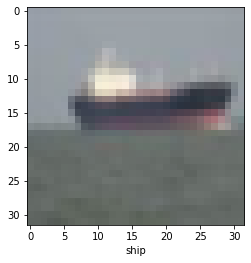

In [28]:
# let's look at a one image
IMG_INDEX = 69 # change this look at other images

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [18]:
model.summary() # let's have a look at our model so far

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [19]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=4, validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 [==============================] - 68s 43ms/step - loss: 1.5062 - accuracy: 0.4535 - val_loss: 1.2640 - val_accuracy: 0.5425
Epoch 2/4
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1410 - accuracy: 0.5969 - val_loss: 1.0851 - val_accuracy: 0.6174
Epoch 3/4
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9967 - accuracy: 0.6504 - val_loss: 0.9622 - val_accuracy: 0.6664
Epoch 4/4
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8976 - accuracy: 0.6872 - val_loss: 0.9088 - val_accuracy: 0.6905


In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.9088 - accuracy: 0.6905 - 3s/epoch - 11ms/step
0.690500020980835


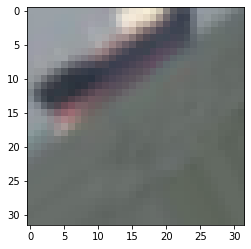

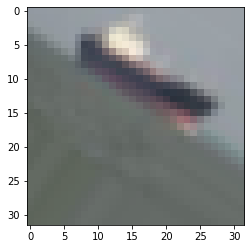

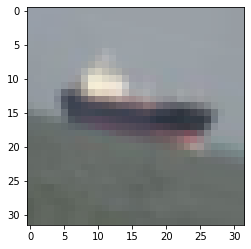

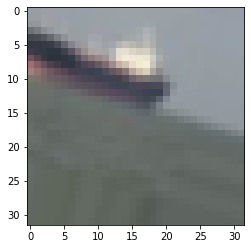

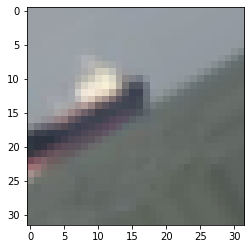

In [56]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
    shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest'
)

# pick an image to transform
test_img = train_images[69]
img = image.img_to_array(test_img) # convert image to numpy arry
img = img.reshape((1,) + img.shape) # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'): # this loops runs forever until we break, saving image to current directory with 
# specified prefix
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i > 4: # show 4 images
    break

plt.show()

In [57]:
print(train_labels[469])
x=np.array(class_names)
print (x[(train_labels[69])])

[7]
['ship']
